In [114]:
pip install vaderSentiment

In [115]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [116]:
from google.colab import files
files.upload()

Saving ETH - ETH-INR(1).csv to ETH - ETH-INR(1) (1).csv


{'ETH - ETH-INR(1).csv': b'Date,Open,High,Low,Close,Adj Close,Volume,Polarity\r\n2021-05-25,192947.2344,200341.1406,174236.0625,197056.5469,197056.5469,3608102183780,0.6\r\n2021-05-26,197087.3906,211624.7813,193086.1563,209929.6875,209929.6875,3088574956023,0\r\n2021-05-27,209933.5781,209933.5781,192303.9219,198898.5156,198898.5156,2425724267472,0\r\n2021-05-28,199333.2031,200705.1406,169137.8281,175185.9688,175185.9688,2895683917421,0.361111\r\n2021-05-29,174763.25,185830.1875,159880.8281,165022.4688,165022.4688,2445004569503,-0.1\r\n,,,,,,,\r\n2021-05-31,172818.2656,196865.4219,165041.875,196799.4688,196799.4688,2247646259773,0.136364\r\n2021-06-01,196264.1719,198597.125,184453.7813,191865.6563,191865.6563,1993554595810,0\r\n,,,,,,,\r\n2021-06-03,197607.0781,210709.1875,194780.9688,208550.5938,208550.5938,2194118451167,0\r\n2021-06-04,208699.5313,208699.5313,187072.2656,195995.8906,195995.8906,2491609665775,0\r\n,,,,,,,\r\n,,,,,,,\r\n,,,,,,,\r\n,,,,,,,\r\n2021-06-09,183183.1719,19157

In [117]:
df = pd.read_csv('ETH - ETH-INR(1).csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume,Polarity
0,2021-05-25,192947.2344,200341.1406,174236.0625,197056.5469,197056.5469,3.608102e+12,0.600000
1,2021-05-26,197087.3906,211624.7813,193086.1563,209929.6875,209929.6875,3.088575e+12,0.000000
2,2021-05-27,209933.5781,209933.5781,192303.9219,198898.5156,198898.5156,2.425724e+12,0.000000
3,2021-05-28,199333.2031,200705.1406,169137.8281,175185.9688,175185.9688,2.895684e+12,0.361111
4,2021-05-29,174763.2500,185830.1875,159880.8281,165022.4688,165022.4688,2.445005e+12,-0.100000
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2021-05-31,172818.2656,196865.4219,165041.8750,196799.4688,196799.4688,2.247646e+12,0.136364
7,2021-06-01,196264.1719,198597.1250,184453.7813,191865.6563,191865.6563,1.993555e+12,0.000000
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2021-06-03,197607.0781,210709.1875,194780.9688,208550.5938,208550.5938,2.194118e+12,0.000000


In [118]:
df = df.dropna()
df = df.reset_index(drop=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume,Polarity
0,2021-05-25,192947.2344,200341.1406,174236.0625,197056.5469,197056.5469,3.608102e+12,0.600000
1,2021-05-26,197087.3906,211624.7813,193086.1563,209929.6875,209929.6875,3.088575e+12,0.000000
2,2021-05-27,209933.5781,209933.5781,192303.9219,198898.5156,198898.5156,2.425724e+12,0.000000
3,2021-05-28,199333.2031,200705.1406,169137.8281,175185.9688,175185.9688,2.895684e+12,0.361111
4,2021-05-29,174763.2500,185830.1875,159880.8281,165022.4688,165022.4688,2.445005e+12,-0.100000
5,2021-05-31,172818.2656,196865.4219,165041.8750,196799.4688,196799.4688,2.247646e+12,0.136364
6,2021-06-01,196264.1719,198597.1250,184453.7813,191865.6563,191865.6563,1.993555e+12,0.000000
7,2021-06-03,197607.0781,210709.1875,194780.9688,208550.5938,208550.5938,2.194118e+12,0.000000
8,2021-06-04,208699.5313,208699.5313,187072.2656,195995.8906,195995.8906,2.491610e+12,0.000000
9,2021-06-09,183183.1719,191577.9219,175872.1406,190365.7813,190365.7813,2.633014e+12,0.000000


In [119]:
# Set the random seed for reproducibility
from numpy.random import seed

seed(1)
from tensorflow import random

random.set_seed(2)

In [120]:
df.dropna(inplace=True)
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Polarity
11,2021-06-12,172442.7500,179214.9063,165925.5313,173741.3125,173741.3125,1.883842e+12,0.000000
12,2021-06-15,189375.2031,193186.3125,184506.9844,191503.4844,191503.4844,2.127440e+12,0.137500
13,2021-06-17,174764.8750,181435.1406,171678.6719,176130.9688,176130.9688,1.624059e+12,0.000000
14,2021-06-20,160991.9063,168698.5469,151992.6250,166554.7656,166554.7656,1.670907e+12,0.166667
15,2021-06-23,139642.7969,151951.7969,135847.8594,147732.2188,147732.2188,2.109262e+12,0.000000


In [121]:
# Dataframe with Adj close, ts_polarity, twitter_volume of APPL
df = df[["Adj Close", "Polarity"]]
df.head()

,Adj Close,Polarity
0,197056.5469,0.600000
1,209929.6875,0.000000
2,198898.5156,0.000000
3,175185.9688,0.361111
4,165022.4688,-0.100000


In [122]:
# pct change based on Adj close value
df["Pct_change"] = df["Adj Close"].pct_change()

# Drop null values
df.dropna(inplace = True)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Adj Close,Polarity,Pct_change
1,209929.6875,0.000000,0.065327
2,198898.5156,0.000000,-0.052547
3,175185.9688,0.361111,-0.119219
4,165022.4688,-0.100000,-0.058015
5,196799.4688,0.136364,0.192562


In [123]:
# This function "window_data" accepts the column number for the features (X) and the target (y)
# It chunks the data up with a rolling window of Xt-n to predict Xt
# It returns a numpy array of X any y
def window_data(df, window, feature_col_number1, feature_col_number2,target_col_number):
    # Create empty lists "X_close", "X_polarity", "X_volume" and y
    X_close = []
    X_polarity = []
   
    y = []
    for i in range(len(df) - window):
        
        # Get close, ts_polarity, tw_vol, and target in the loop
        close = df.iloc[i:(i + window), feature_col_number1]
        Polarity = df.iloc[i:(i + window), feature_col_number2]
        
        target = df.iloc[(i + window), target_col_number]
        
        # Append values in the lists
        X_close.append(close)
        X_polarity.append(Polarity)
       
        y.append(target)
        
    return np.hstack((X_close,X_polarity)), np.array(y).reshape(-1, 1)

In [124]:
# Predict Closing Prices using a 3 day window of previous closing prices
window_size = 3

# Column index 0 is the `Adj Close` column
# Column index 1 is the `ts_polarity` column
# Column index 2 is the `twitter_volume` column
feature_col_number1 = 0
feature_col_number2 = 1

target_col_number = 0
X, y = window_data(df, window_size, feature_col_number1, feature_col_number2,target_col_number)

In [125]:
# Use 70% of the data for training and the remaineder for testing
X_split = int(0.7 * len(X))
y_split = int(0.7 * len(y))

X_train = X[: X_split]
X_test = X[X_split:]
y_train = y[: y_split]
y_test = y[y_split:]

In [126]:
from sklearn.preprocessing import MinMaxScaler

In [127]:
# Use the MinMaxScaler to scale data between 0 and 1.
x_train_scaler = MinMaxScaler()
x_test_scaler = MinMaxScaler()
y_train_scaler = MinMaxScaler()
y_test_scaler = MinMaxScaler()

# Fit the scaler for the Training Data
x_train_scaler.fit(X_train)
y_train_scaler.fit(y_train)

# Scale the training data
X_train = x_train_scaler.transform(X_train)
y_train = y_train_scaler.transform(y_train)

# Fit the scaler for the Testing Data
x_test_scaler.fit(X_test)
y_test_scaler.fit(y_test)

# Scale the y_test data
X_test = x_test_scaler.transform(X_test)
y_test = y_test_scaler.transform(y_test)

In [128]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [129]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [130]:
# Build the LSTM model. 

# Define the LSTM RNN model.
model = Sequential()

number_units = 9
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
    
model.add(Dropout(dropout_fraction))

# Layer 2
# The return_sequences parameter needs to set to True every time we add a new LSTM layer, excluding the final layer.
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [131]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [132]:
# Summarize the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 6, 9)              396       
_________________________________________________________________
dropout_12 (Dropout)         (None, 6, 9)              0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 6, 9)              684       
_________________________________________________________________
dropout_13 (Dropout)         (None, 6, 9)              0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 9)                 684       
_________________________________________________________________
dropout_14 (Dropout)         (None, 9)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [133]:
# Train the model
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=5, verbose=1)

Epoch 1/10
2/2 [==============================] - 5s 13ms/step - loss: 0.3340
Epoch 2/10
2/2 [==============================] - 0s 11ms/step - loss: 0.3184
Epoch 3/10
2/2 [==============================] - 0s 12ms/step - loss: 0.3028
Epoch 4/10
2/2 [==============================] - 0s 18ms/step - loss: 0.2856
Epoch 5/10
2/2 [==============================] - 0s 13ms/step - loss: 0.2506
Epoch 6/10
2/2 [==============================] - 0s 12ms/step - loss: 0.2643
Epoch 7/10
2/2 [==============================] - 0s 12ms/step - loss: 0.2251
Epoch 8/10
2/2 [==============================] - 0s 12ms/step - loss: 0.2422
Epoch 9/10
2/2 [==============================] - 0s 15ms/step - loss: 0.2181
Epoch 10/10
2/2 [==============================] - 0s 12ms/step - loss: 0.2015


In [134]:
# Evaluate the model for loss
model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 1s/step - loss: 0.2186


0.21855959296226501

In [135]:
#Make some predictions
predicted = model.predict(X_test)

In [136]:
# Evaluating the model
from sklearn import metrics

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print('R-squared :', metrics.r2_score(y_test, predicted))

Root Mean Squared Error: 0.46750354962365676
R-squared : -0.6636785145963784


In [137]:
# Recover the original prices instead of the scaled version
predicted_prices = y_test_scaler.inverse_transform(predicted)
real_prices = y_test_scaler.inverse_transform(y_test.reshape(-1, 1))

In [138]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = df.index[-len(real_prices): ]) 
stocks.head()

,Real,Predicted
12,191503.4844,157699.734375
13,176130.9688,157507.000000
14,166554.7656,156507.859375
15,147732.2188,156923.921875


In [139]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

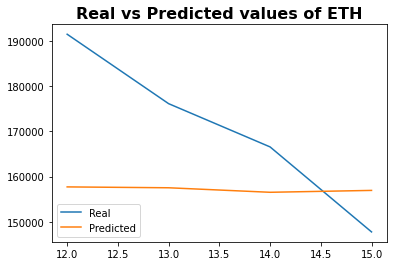

<Figure size 720x720 with 0 Axes>

In [140]:
plt.plot(stocks['Real'], label="Real")
plt.plot(stocks['Predicted'], label="Predicted")

# Add legend
plt.legend(loc='lower left')
# Add title and x, y labels
plt.title("Real vs Predicted values of ETH", fontsize=16, fontweight='bold')
plt.figure(figsize=(10, 10))
plt.show()